# 1. Intro to Macro Data

First we need to load in some libraries, in particular:
- `numpy` and `pandas` for working with data
- `matplotlib` for plotting data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This will make the graphs look better (optional).

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

Run this if you have an HD display (optional)

In [3]:
%config InlineBackend.figure_format = 'retina'

## Numerical Data

Here we plot the function $y = x \cdot (1-x)$ using `numpy` arrays and `matplotlib`.

In [4]:
x = np.linspace(0, 1, 11)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [5]:
y = x*(1-x)
y

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

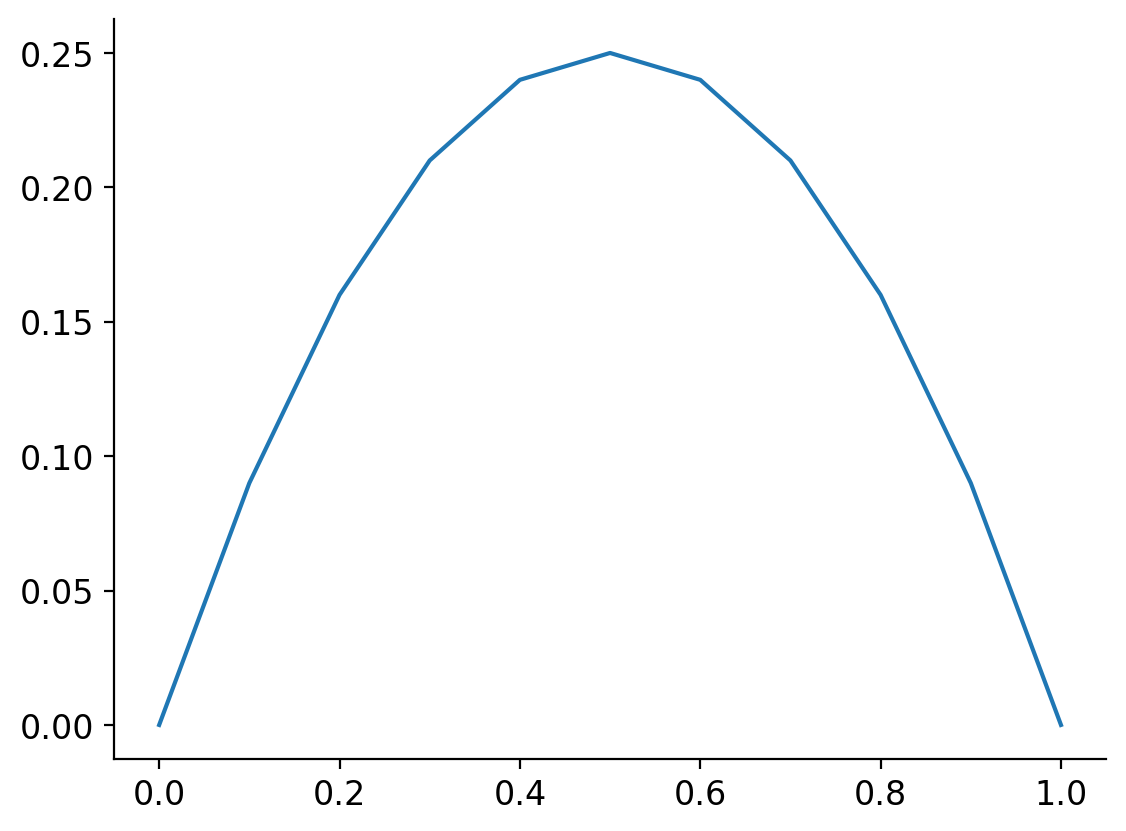

In [6]:
plt.plot(x, y);

## Data Frames

It turns out DataFrames are a really useful construct for handling data! Let's do the same as we did above with `pandas`.

In [7]:
datf = pd.DataFrame({
    'x': np.linspace(0, 1, 10)
})
datf['y'] = datf['x'] * (1 - datf['x'])
datf['z'] = 0.25 * datf['x']
datf

,x,y,z
0,0.000000,0.000000,0.000000
1,0.111111,0.098765,0.027778
2,0.222222,0.172840,0.055556
3,0.333333,0.222222,0.083333
4,0.444444,0.246914,0.111111
5,0.555556,0.246914,0.138889
6,0.666667,0.222222,0.166667
7,0.777778,0.172840,0.194444
8,0.888889,0.098765,0.222222
9,1.000000,0.000000,0.250000


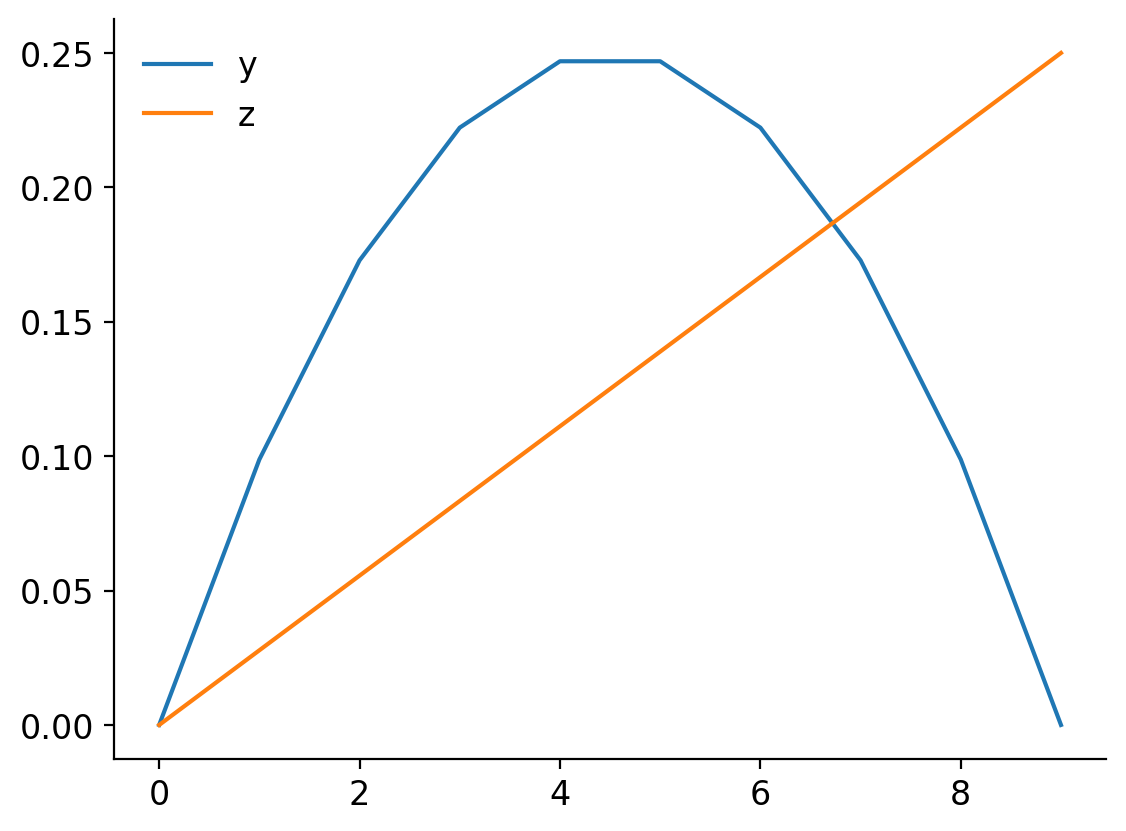

In [8]:
datf[['y', 'z']].plot();

## Loading Data

Let's load the real GDP series from FRED.

In [9]:
gdp = pd.read_excel('data/GDPCA.xls', index_col='Year')

Now we use the `pandas` plotting interface. This makes things easier.

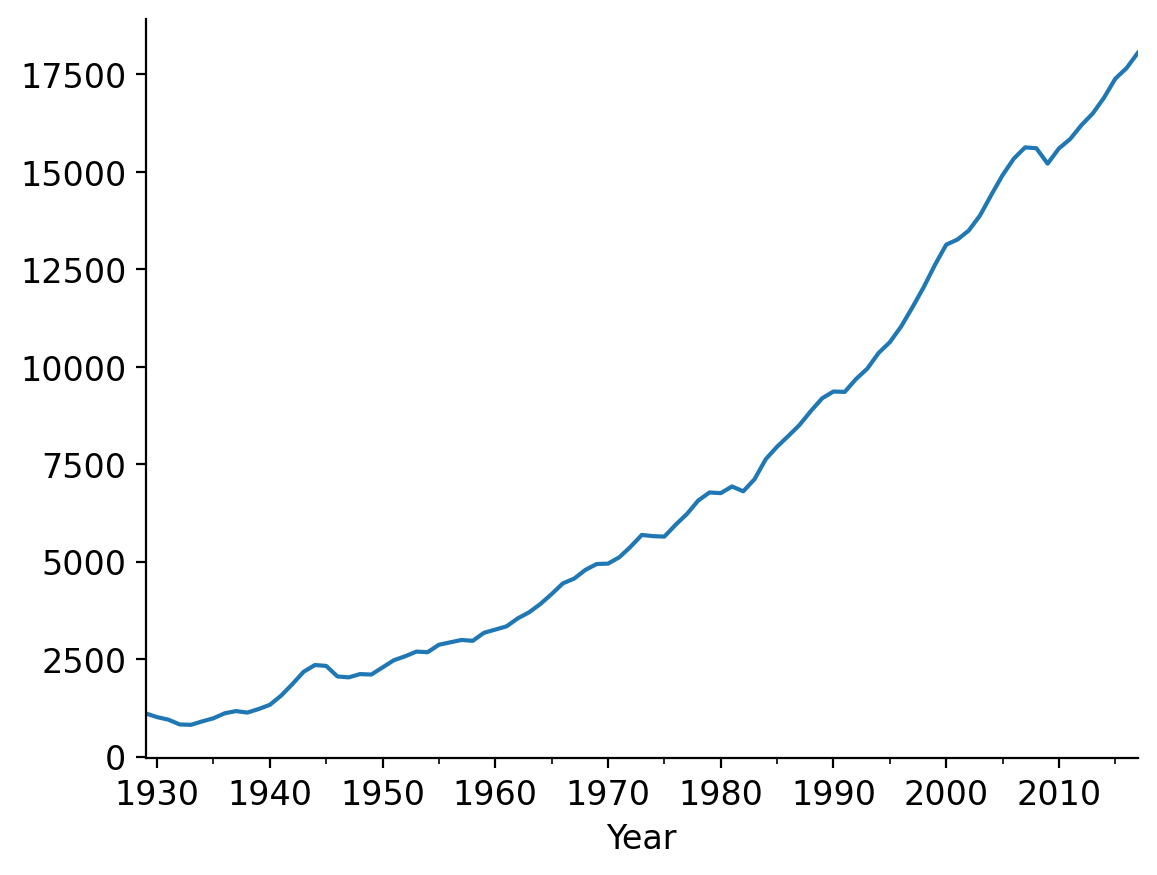

In [10]:
gdp['GDP'].plot();

We can look at the difference in log values to get the growth rate.

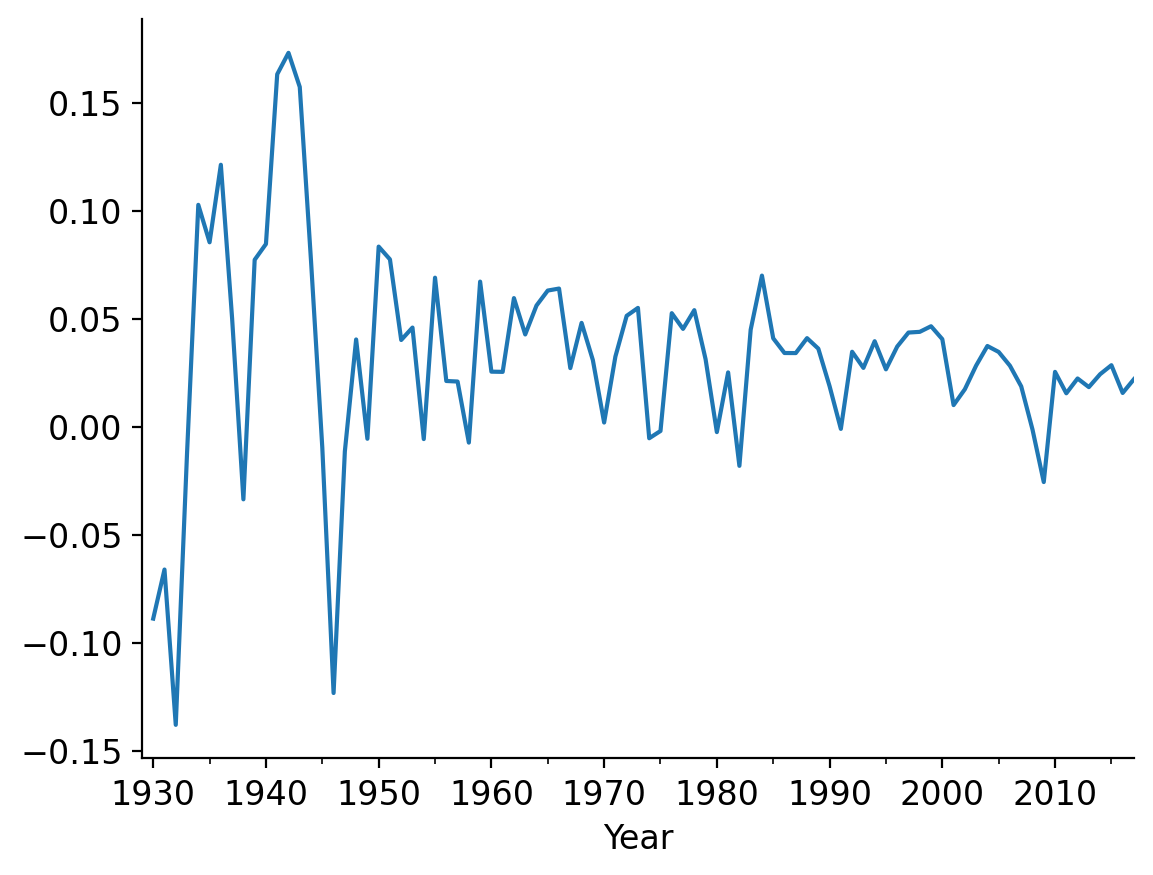

In [11]:
growth = np.log(gdp['GDP']).diff()
growth.plot();

## Maddison Project

Ok, now let's look a situation with multiple data series. In this case, we'll have real GDP for multiple countries over many years. This comes from the Maddison Project's regional data.

In [12]:
mpd0 = pd.read_excel('data/mpd2018_region_data.xlsx', sheet_name='Long data')

We need to get this in the right shape. Currently it's in "long" format, but we want "wide" format for plotting.

In [13]:
mpd = mpd0.pivot(index='year', columns='region_name')
mpd['cgdppc']

region_name,Africa,East Asia,Eastern Europe,Latin America,Western Asia,Western Europe,Western Offshoots,World
year,,,,,,,,
1870,NaN,811.0,NaN,943.0,NaN,2480.0,3692.0,1263.0
1871,NaN,NaN,NaN,NaN,NaN,2503.0,3779.0,NaN
1872,NaN,NaN,NaN,NaN,NaN,2626.0,3839.0,NaN
1873,NaN,NaN,NaN,NaN,NaN,2654.0,3960.0,NaN
1874,NaN,NaN,NaN,NaN,NaN,2761.0,3860.0,NaN
...,...,...,...,...,...,...,...,...
2012,4614.0,9105.0,18684.0,13949.0,21359.0,38345.0,49033.0,13821.0
2013,4577.0,9354.0,19073.0,14193.0,21498.0,39154.0,49399.0,14038.0
2014,4638.0,9710.0,19129.0,14140.0,21071.0,39664.0,50151.0,14261.0


Finally, we plot the data in logs to see growth rates

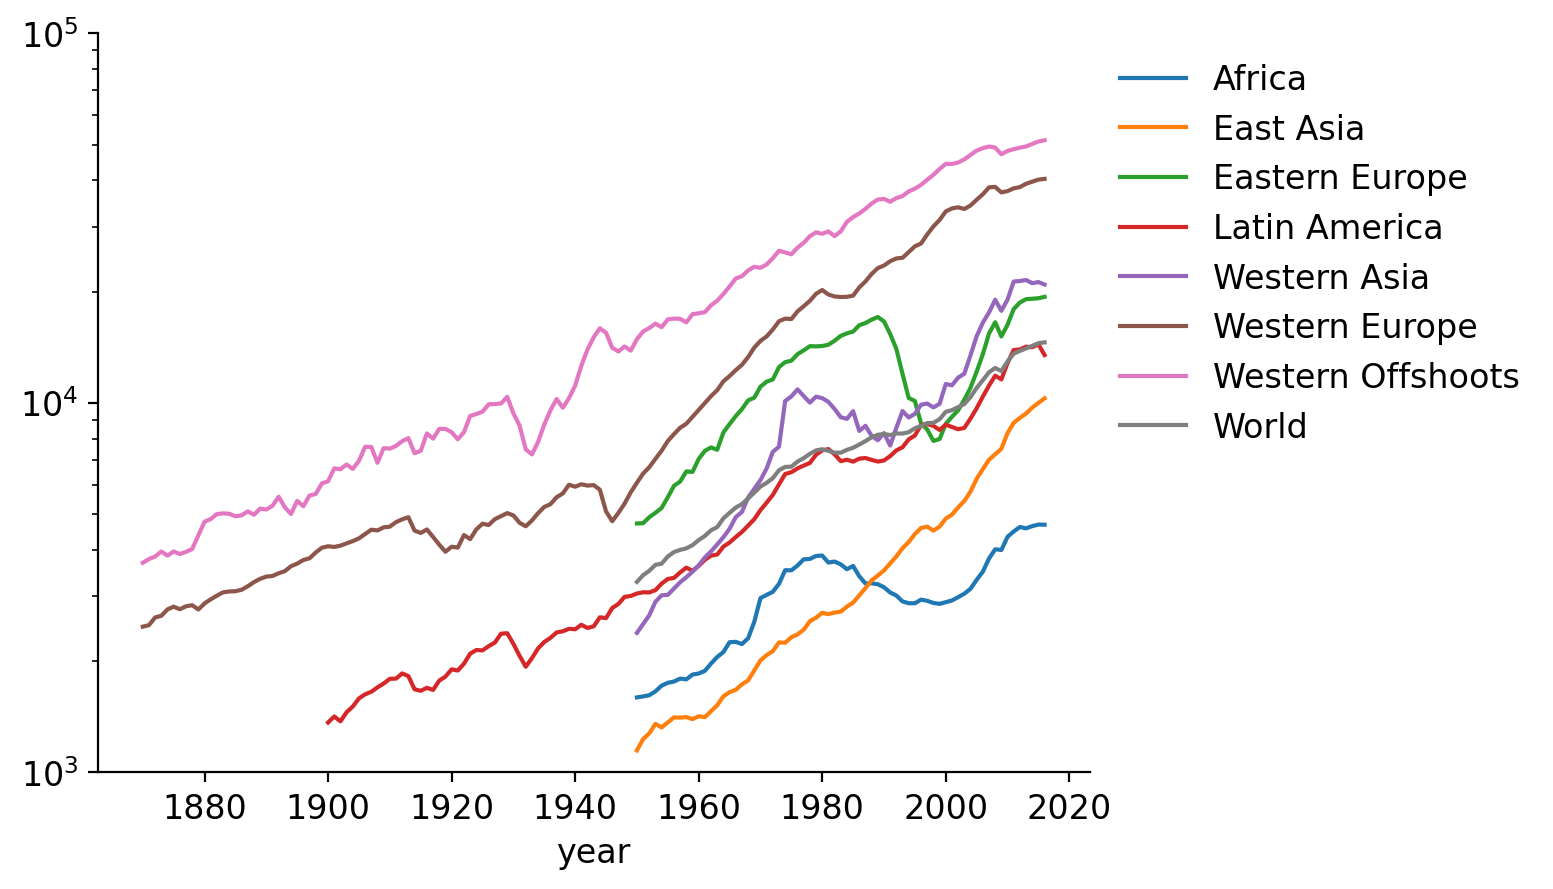

In [14]:
mpd['cgdppc'].plot(logy=True, ylim=(1e3, 1e5));
plt.legend(bbox_to_anchor=(1, 1)); # this puts the legend on the right side

## Penn World Tables

We can take a similar approach with the latest Penn World Tables data

In [15]:
pwt0 = pd.read_excel('data/pwt100.xlsx', sheet_name='Data')
pwt = pwt0.pivot(index='year', columns='countrycode')

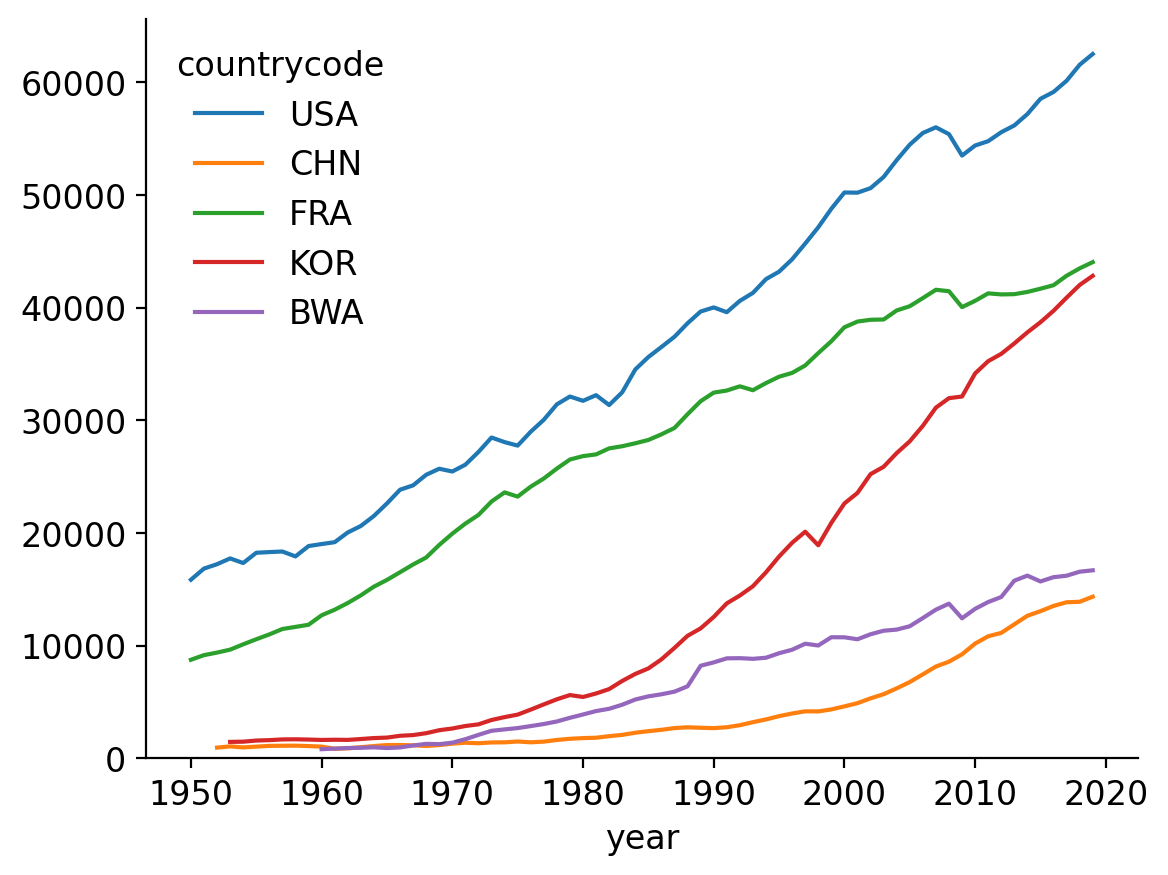

In [16]:
gdp_per = pwt['rgdpna']/pwt['pop']
gdp_per[['USA', 'CHN', 'FRA', 'KOR', 'BWA']].plot(ylim=(0, None));

We can also do things like plot the average hours worked across all countries over the years.

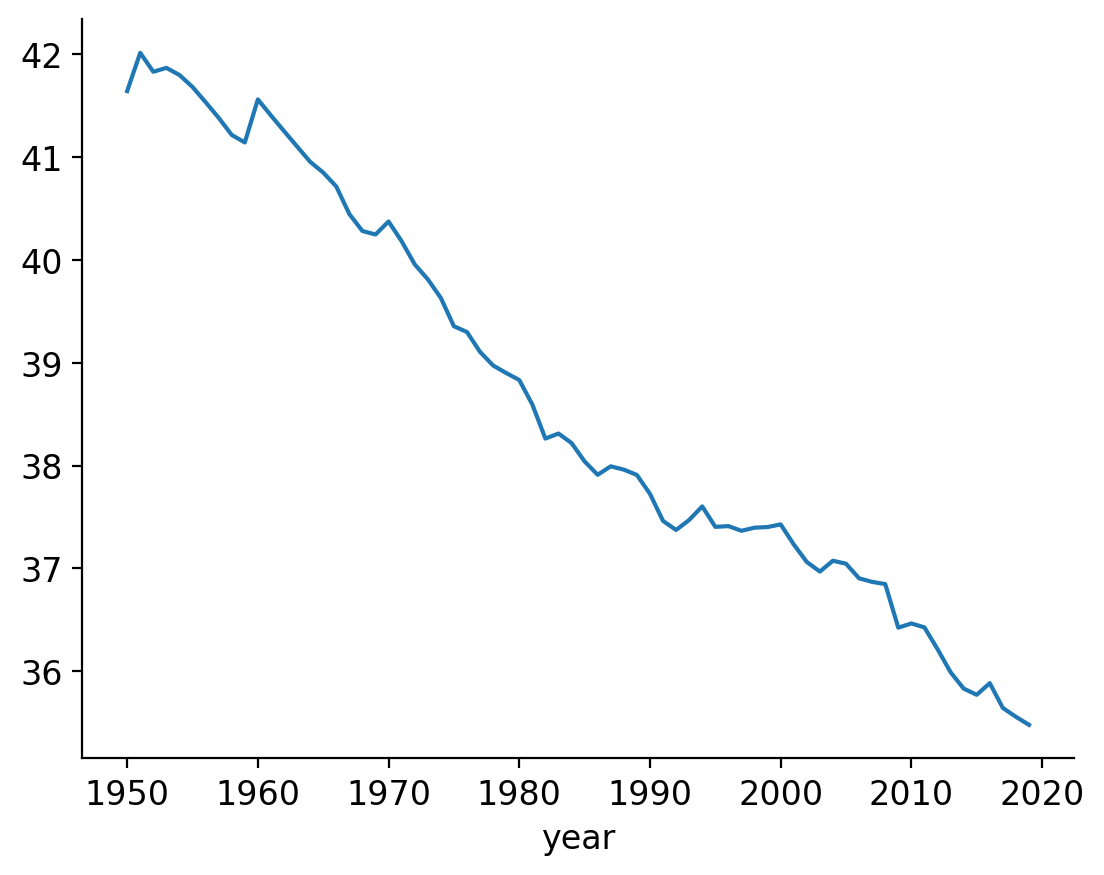

In [17]:
hrs_per_week = (7/365)*pwt['avh']
hrs_per_week.mean(axis=1).plot();